🔥 Epoch 1:
  ✅ Tebakan harga: 400.00 juta (Seharusnya 500.0 juta)
  ❌ Error: -100.00 juta

📌 **1️⃣ Forward Pass Equation:**
   Y_pred = W * X + bias
   Y_pred = 8.0045 * 50.0 + 0.0001 = 400.0000

📌 **2️⃣ Error Calculation Equation:**
   Error = Y_pred - Y_true
   Error = 400.0000 - 500.0000 = -100.0000

📌 **3️⃣ Gradient Calculation Equation:**
   grad_W = 2 * X * Error
   grad_W = 2 * 50.0 * -100.0000 = -10000.0000
   grad_b = 2 * Error
   grad_b = 2 * -100.0000 = -200.0000

📌 **4️⃣ Exponential Moving Average (EMA) Equation:**
   E[g^2]_t = rho * E[g^2]_0 + (1 - rho) * grad_W^2
   E[g^2]_1 = 0.95 * 5000000.000000 + (1 - 0.95) * 100000000.000000
   E[g^2]_1 = 5000000.000000

🔥 Epoch 2:
  ✅ Tebakan harga: 400.22 juta (Seharusnya 500.0 juta)
  ❌ Error: -99.78 juta

📌 **1️⃣ Forward Pass Equation:**
   Y_pred = W * X + bias
   Y_pred = 8.0090 * 50.0 + 0.0002 = 400.2237

📌 **2️⃣ Error Calculation Equation:**
   Error = Y_pred - Y_true
   Error = 400.2237 - 500.0000 = -99.7763

📌 **3️⃣ Gradie

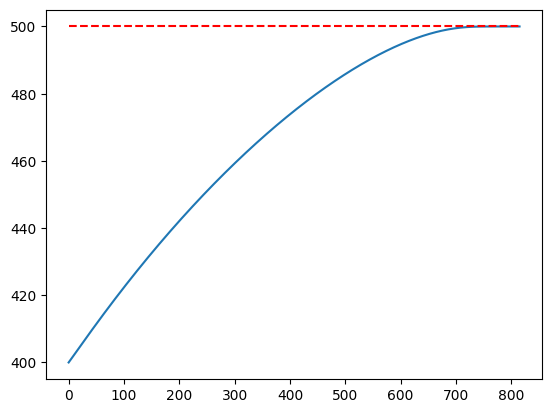

In [26]:
import numpy as np

# Inisialisasi variabel
rho = 0.95  # Faktor decay rata-rata eksponensial
epsilon = 1e-6  # Prevent division by zero

# Data (X = luas tanah dalam m², Y = harga rumah dalam juta)
X = np.array([50], dtype=float)  # Input (luas tanah)
Y_true = np.array([500], dtype=float)  # Harga sebenarnya (dalam juta)

# Bobot awal (asumsi harga rumah per m²) → HARUS float
W = np.array([8.0], dtype=float)  # Dari int64 ke float64
bias = 0.0  # Bias juga harus float

# Variabel untuk menyimpan rata-rata eksponensial
E_grad_squared = 0.0  # Simpan rata-rata gradien kuadrat
E_delta_squared = 0.0  # Simpan rata-rata perubahan bobot kuadrat sebelumnya

# Fungsi untuk menampilkan hasil dengan format equation
def tampil(epoch, Y_pred, error, grad_W, grad_b, delta_W, delta_b, W, bias, E_grad_squared, E_delta_squared):
    print("="*50)
    print(f"🔥 Epoch {epoch}:")
    print(f"  ✅ Tebakan harga: {Y_pred[0]:.2f} juta (Seharusnya {Y_true[0]} juta)")
    print(f"  ❌ Error: {error[0]:.2f} juta\n")

    print("📌 **1️⃣ Forward Pass Equation:**")
    print(f"   Y_pred = W * X + bias")
    print(f"   Y_pred = {W[0]:.4f} * {X[0]} + {bias:.4f} = {Y_pred[0]:.4f}")

    print("\n📌 **2️⃣ Error Calculation Equation:**")
    print(f"   Error = Y_pred - Y_true")
    print(f"   Error = {Y_pred[0]:.4f} - {Y_true[0]:.4f} = {error[0]:.4f}")

    print("\n📌 **3️⃣ Gradient Calculation Equation:**")
    print(f"   grad_W = 2 * X * Error")
    print(f"   grad_W = 2 * {X[0]} * {error[0]:.4f} = {grad_W:.4f}")
    print(f"   grad_b = 2 * Error")
    print(f"   grad_b = 2 * {error[0]:.4f} = {grad_b:.4f}")

    print("\n📌 **4️⃣ Exponential Moving Average (EMA) Equation:**")
    print(f"   E[g^2]_t = rho * E[g^2]_{epoch-1} + (1 - rho) * grad_W^2")
    print(f"   E[g^2]_{epoch} = {rho:.2f} * {E_grad_squared:.6f} + (1 - {rho:.2f}) * {grad_W**2:.6f}")
    print(f"   E[g^2]_{epoch} = {E_grad_squared:.6f}\n")

    print("="*50)
predict = []
# Iterasi pembelajaran (loop sampai tebakan harga >= 500 juta)
epoch = 0
while True:
    # 1️⃣ Forward Pass: Prediksi harga rumah
    Y_pred = W * X + bias  # Y_pred = W * luas_tanah + bias
    
    # 2️⃣ Hitung error
    error = Y_pred - Y_true  # Seberapa jauh tebakan dari harga sebenarnya

    # 3️⃣ Hitung gradien (turunan) terhadap bobot W dan bias
    grad_W = np.mean(2 * X * error)  # dL/dW = 2 * X * error
    grad_b = np.mean(2 * error)  # dL/db = 2 * error

    # 4️⃣ Update rata-rata eksponensial dari gradien kuadrat
    E_grad_squared = rho * E_grad_squared + (1 - rho) * grad_W**2

    # 5️⃣ Hitung perubahan bobot menggunakan rasio rata-rata
    delta_W = - (np.sqrt(E_delta_squared + epsilon) / np.sqrt(E_grad_squared + epsilon)) * grad_W
    delta_b = - (np.sqrt(E_delta_squared + epsilon) / np.sqrt(E_grad_squared + epsilon)) * grad_b

    # 6️⃣ Update rata-rata eksponensial dari perubahan bobot kuadrat
    E_delta_squared = rho * E_delta_squared + (1 - rho) * delta_W**2

    # 7️⃣ Update bobot dan bias
    W += delta_W
    bias += delta_b
    epoch += 1
    if epoch <4:
        tampil(epoch, Y_pred, error, grad_W, grad_b, delta_W, delta_b, W, bias, E_grad_squared, E_delta_squared)
    # ✅ Jika tebakan harga >= 500 juta, tampilkan hasil dan hentikan training
    if Y_pred[0] >= 500:
        tampil(epoch, Y_pred, error, grad_W, grad_b, delta_W, delta_b, W, bias, E_grad_squared, E_delta_squared)
        break

    predict.append(Y_pred[0])
    
    # 🔥 Cetak hasil tiap epoch
import matplotlib.pyplot as plt


x = [a for a in range(len(predict))]
y = predict

fig, ax = plt.subplots()
ax.plot(x, y)
ax.hlines(y=500, xmin=0, xmax=len(predict)-1, colors="red", linestyles="dashed", label="Target 500")
plt.show()


In [1]:
import tensorflow as tf

# Cek apakah GPU terdeteksi
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"TensorFlow menggunakan GPU. Jumlah GPU yang terdeteksi: {len(gpus)}")
    # Menampilkan detail perangkat GPU
    for gpu in gpus:
        print(f"Nama GPU: {gpu.name}")
else:
    print("TensorFlow tidak mendeteksi GPU. Menggunakan CPU.")


2025-04-30 16:42:56.624717: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-30 16:42:56.742621: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746006176.795978    4174 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746006176.815188    4174 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746006176.899696    4174 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow menggunakan GPU. Jumlah GPU yang terdeteksi: 1
Nama GPU: /physical_device:GPU:0


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
